In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("D:\BE\dmv\datasets\AirQuality.csv")

In [18]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [20]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [21]:
# Drop columns with a high percentage of missing values
columns_to_drop = ['PM10', 'NH3', 'Xylene']
df.drop(columns=columns_to_drop, inplace=True)

In [22]:
# Forward fill and backward fill missing values in essential columns
df['AQI'].fillna(method='ffill', inplace=True)
df['AQI'].fillna(method='bfill', inplace=True)

In [23]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else: #if categorical
        df[column].fillna(df[column].mode(), inplace=True)

In [24]:
print(df.isnull().sum())

City             0
Date             0
PM2.5            0
NO               0
NO2              0
NOx              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI              0
AQI_Bucket    4680
dtype: int64


In [26]:
mode_value = df['AQI_Bucket'].mode()[0]

df['AQI_Bucket'].fillna(mode_value, inplace=True)

In [27]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
NO            0
NO2           0
NOx           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [29]:
#converting date to standard format
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,209.0,Moderate
1,Ahmedabad,2015-01-02,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,209.0,Moderate
2,Ahmedabad,2015-01-03,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,209.0,Moderate
3,Ahmedabad,2015-01-04,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,209.0,Moderate
4,Ahmedabad,2015-01-05,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,209.0,Moderate


## Visualization

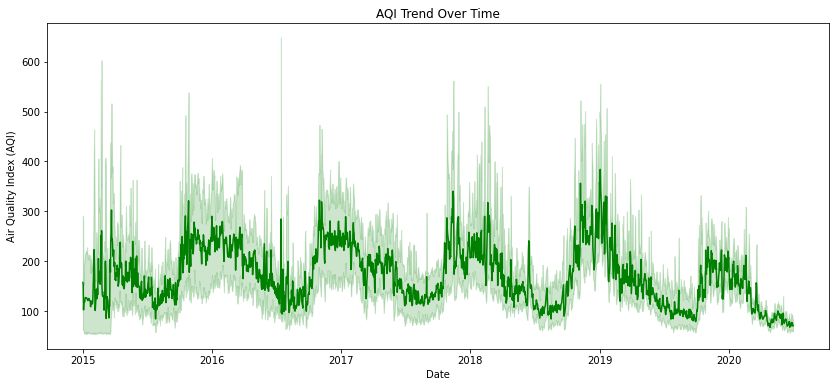

In [33]:
#01 : AQI Trend over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='AQI', data =df, color='green')
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')
#plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

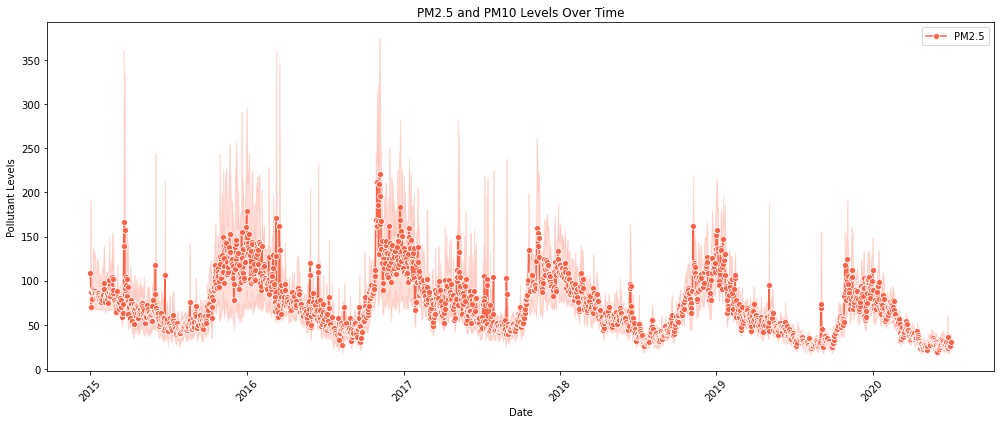

In [35]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='PM2.5', data=df, color='tomato', label='PM2.5', marker='o')
plt.title('PM2.5 and PM10 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Levels')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

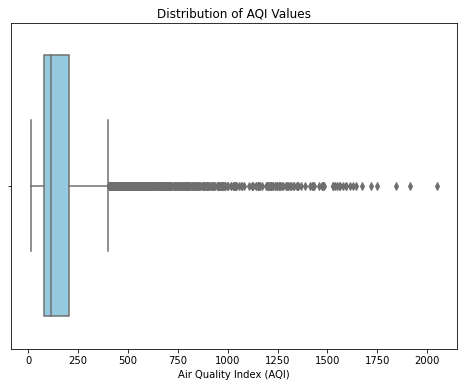

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='AQI', data=df, color='skyblue')
plt.title('Distribution of AQI Values')
plt.xlabel('Air Quality Index (AQI)')
plt.show()

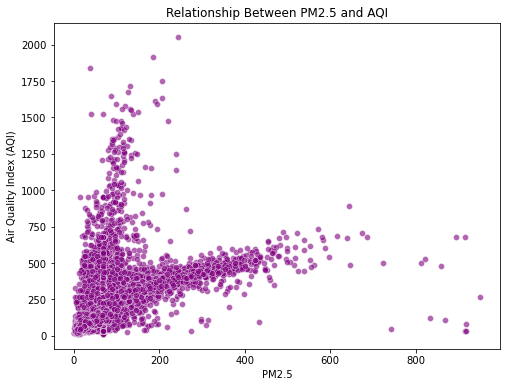

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='AQI', data=df, color='purple', alpha=0.6)
plt.title('Relationship Between PM2.5 and AQI')
plt.xlabel('PM2.5')
plt.ylabel('Air Quality Index (AQI)')
plt.show()